In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tinovation-grades-2022/sample_submission.csv
/kaggle/input/tinovation-grades-2022/student_info.txt
/kaggle/input/tinovation-grades-2022/train.csv
/kaggle/input/tinovation-grades-2022/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/tinovation-grades-2022/train.csv",index_col=[0])
train_data['G4'] = (train_data['G1']+train_data['G2'])/2
test_data = pd.read_csv("/kaggle/input/tinovation-grades-2022/test.csv",index_col=[0])
test_data['G4'] = (test_data['G1']+test_data['G2'])/2
#print(train_data)

In [3]:
X = train_data.loc[0:,['G4']]
y = train_data.loc[0:,['G3']]

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
y = ss.fit_transform(y)

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

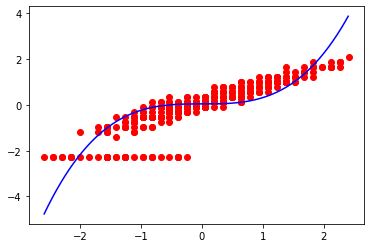

In [6]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.show()

In [7]:
xt = test_data.loc[0:,['G4']]
y_pred = regressor.predict(ss.fit_transform(xt)).reshape(-1,1)
y_pred = ss.inverse_transform(y_pred) 
# print(y_pred)
y_pred = y_pred.ravel()
output = pd.DataFrame({'Id': list(range(0,75)), 'G3': y_pred})
output['G3'] = output['G3'].round()
print(output.to_string())
output.to_csv('submission.csv', index=False)

    Id    G3
0    0   9.0
1    1  16.0
2    2  11.0
3    3  11.0
4    4  11.0
5    5  10.0
6    6   7.0
7    7  11.0
8    8  11.0
9    9  12.0
10  10  11.0
11  11  13.0
12  12  10.0
13  13   9.0
14  14  11.0
15  15   1.0
16  16  11.0
17  17  11.0
18  18  12.0
19  19  11.0
20  20  11.0
21  21  10.0
22  22  11.0
23  23  19.0
24  24   5.0
25  25  11.0
26  26  11.0
27  27  11.0
28  28  11.0
29  29  11.0
30  30  15.0
31  31  19.0
32  32  19.0
33  33   3.0
34  34  11.0
35  35  12.0
36  36  11.0
37  37  11.0
38  38  11.0
39  39  11.0
40  40  11.0
41  41  13.0
42  42  12.0
43  43  11.0
44  44   9.0
45  45  10.0
46  46  11.0
47  47  11.0
48  48   9.0
49  49  10.0
50  50  13.0
51  51  11.0
52  52  11.0
53  53  11.0
54  54  13.0
55  55  11.0
56  56  11.0
57  57  10.0
58  58  19.0
59  59   7.0
60  60  15.0
61  61  11.0
62  62   9.0
63  63   6.0
64  64  12.0
65  65  10.0
66  66  11.0
67  67  11.0
68  68  11.0
69  69  11.0
70  70  11.0
71  71  11.0
72  72  11.0
73  73  11.0
74  74  11.0


In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

In [9]:
train_data['sex'] = train_data['sex'].eq('M').mul(1)
train_data['address'] = train_data['address'].eq('U').mul(1)
train_data['guardian'] = train_data['guardian'].eq('mother').mul(1)
train_data['schoolsup'] = train_data['schoolsup'].eq('yes').mul(1)
train_data['famsup'] = train_data['famsup'].eq('yes').mul(1)
train_data['paid'] = train_data['paid'].eq('yes').mul(1)
train_data['activities'] = train_data['activities'].eq('yes').mul(1)
train_data['nursery'] = train_data['nursery'].eq('yes').mul(1)
train_data['internet'] = train_data['internet'].eq('yes').mul(1)
train_data['romantic'] = train_data['romantic'].eq('yes').mul(1)

test_data['sex'] = test_data['sex'].eq('M').mul(1)
test_data['address'] = test_data['address'].eq('U').mul(1)
test_data['guardian'] = test_data['guardian'].eq('mother').mul(1)
test_data['schoolsup'] = test_data['schoolsup'].eq('yes').mul(1)
test_data['famsup'] = test_data['famsup'].eq('yes').mul(1)
test_data['paid'] = test_data['paid'].eq('yes').mul(1)
test_data['activities'] = test_data['activities'].eq('yes').mul(1)
test_data['nursery'] = test_data['nursery'].eq('yes').mul(1)
test_data['internet'] = test_data['internet'].eq('yes').mul(1)
test_data['romantic'] = test_data['romantic'].eq('yes').mul(1)

In [10]:
possible_features = train_data.columns.copy().drop('G3')

# Check feature importances
selector = SelectKBest(f_regression, k = len(possible_features))
selector.fit(train_data[possible_features], train_data['G3'])
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
print('Feature importances:')
for i in range(len(scores)):
    print('%.2f %s' % (scores[indices[i]], possible_features[indices[i]]))

Feature importances:
147.12 G2
135.23 G4
89.05 G1
12.83 failures
2.90 age
2.08 goout
2.01 romantic
1.45 address
1.40 sex
1.37 paid
1.30 internet
1.28 studytime
1.00 schoolsup
0.65 health
0.56 Dalc
0.52 Walc
0.51 nursery
0.51 famrel
0.36 famsup
0.30 absences
0.18 guardian
0.13 activities
0.08 freetime
